# Network Science (HS21)
## Assignment 4

### Ben     Murphy          16-714-925
### Florian Rüegsegger      14-714-737

#### The excercise was solved together in person

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.readwrite.gml import read_gml
from networkx.algorithms.community.label_propagation import label_propagation_communities
from networkx.algorithms.community.modularity_max import greedy_modularity_communities
from networkx.algorithms.smallworld import random_reference
from typing import Dict
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def label_propagation(graphs: Dict[str, nx.Graph]):
    communities = {}
    for key, graph in graphs.items():
        communities[key] = list(label_propagation_communities(graph))
    return communities
    

def greedy_modularity(graphs: Dict[str, nx.Graph]):
    communities = {}
    for key, graph in graphs.items():
        communities[key] = greedy_modularity_communities(graph)
    return communities


def randomise_graph(graphs: Dict[str, nx.Graph]):
    for graph in graphs:
        random_reference(graph)
        
def plot_graph(title, label, graph: nx.Graph):

    size_of_community = len(label)
    colour_spectrum = np.linspace(0,1,size_of_community)
    count = 0
    for community in label:
        for node in community:
            graph.nodes[node]['colour'] = colour_spectrum[count]
        count += 1
    plt.figure(figsize=(10,5))
    ax = plt.gca()
    ax.set_title(title)
    colours = [graph.nodes[node]['colour'] for node in graph]
    nx.draw(graph, node_color=colours)

In [3]:
graphs = {}
graphs['Karate'] = read_gml('data/graph_karate.gml')
graphs['Dolphins'] = read_gml('data/graph_dolphins.gml')
graphs['Facebook'] = read_gml('data/graph_facebook.gml')

In [4]:
randomised_graphs = {}
for key, graph in graphs.items():
    randomised_graphs[key] = random_reference(graph, connectivity=False)

In [5]:
greedy_dict = greedy_modularity(graphs)
greedy_randomised_dict = greedy_modularity(randomised_graphs)

In [6]:
label_dict = label_propagation(graphs)
label_randomised_dict = label_propagation(randomised_graphs)

Size of greedy Karate community before random = 3
Size of greedy Karate community after random = 4
Size of label Karate community before random = 3
Size of label Karate community after random = 2


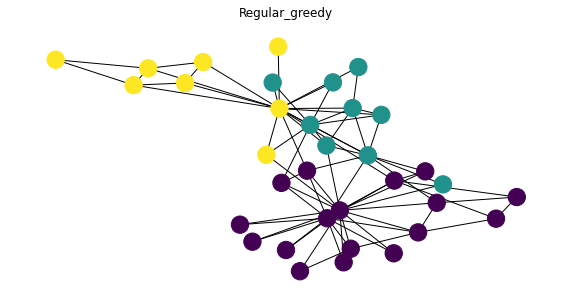

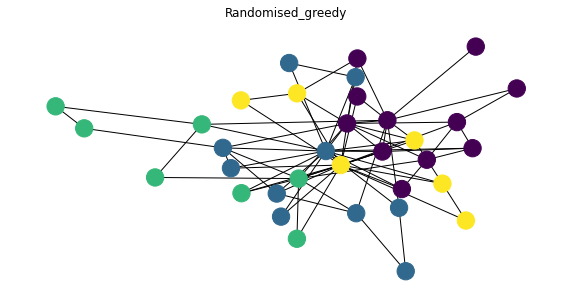

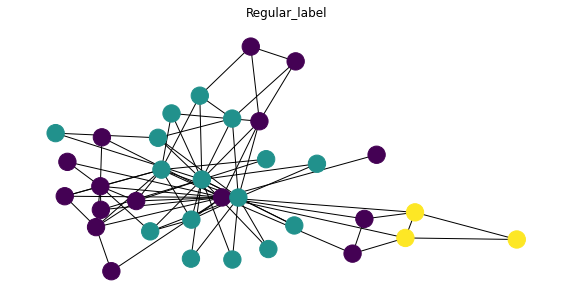

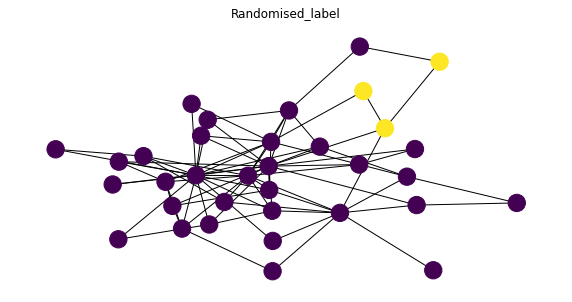

In [7]:
print(f"Size of greedy Karate community before random = {len(greedy_dict['Karate'])}")
print(f"Size of greedy Karate community after random = {len(greedy_randomised_dict['Karate'])}")
print(f"Size of label Karate community before random = {len(label_dict['Karate'])}")
print(f"Size of label Karate community after random = {len(label_randomised_dict['Karate'])}")
plot_graph('Regular_greedy', greedy_dict['Karate'], graphs['Karate'])
plot_graph('Randomised_greedy', greedy_randomised_dict['Karate'], randomised_graphs['Karate'])
plot_graph('Regular_label', label_dict['Karate'], graphs['Karate'])
plot_graph('Randomised_label', label_randomised_dict['Karate'], randomised_graphs['Karate'])

Size of greedy Dolphins community before random = 4
Size of greedy Dolphins community after random = 7
Size of label Dolphins community before random = 6
Size of label Dolphins community after random = 2


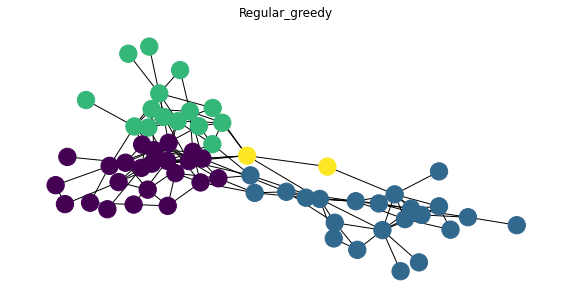

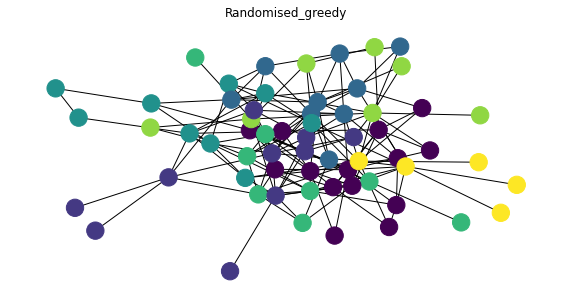

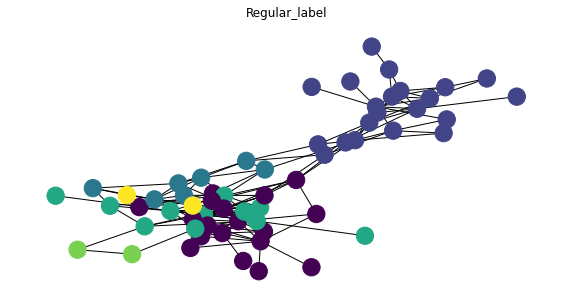

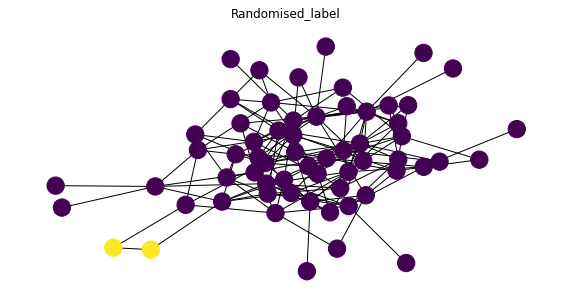

In [8]:
print(f"Size of greedy Dolphins community before random = {len(greedy_dict['Dolphins'])}")
print(f"Size of greedy Dolphins community after random = {len(greedy_randomised_dict['Dolphins'])}")
print(f"Size of label Dolphins community before random = {len(label_dict['Dolphins'])}")
print(f"Size of label Dolphins community after random = {len(label_randomised_dict['Dolphins'])}")
plot_graph('Regular_greedy', greedy_dict['Dolphins'], graphs['Dolphins'])
plot_graph('Randomised_greedy', greedy_randomised_dict['Dolphins'], randomised_graphs['Dolphins'])
plot_graph('Regular_label', label_dict['Dolphins'], graphs['Dolphins'])
plot_graph('Randomised_label', label_randomised_dict['Dolphins'], randomised_graphs['Dolphins'])

Size of greedy Facebook community before random = 13
Size of greedy Facebook community after random = 19
Size of label Facebook community before random = 44
Size of label Facebook community after random = 1


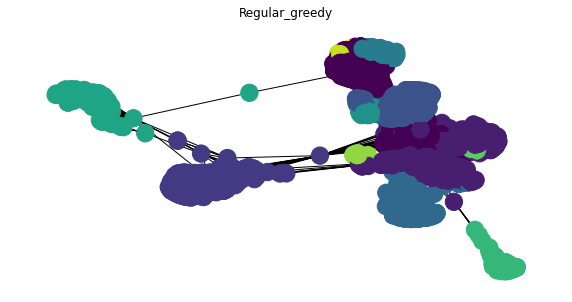

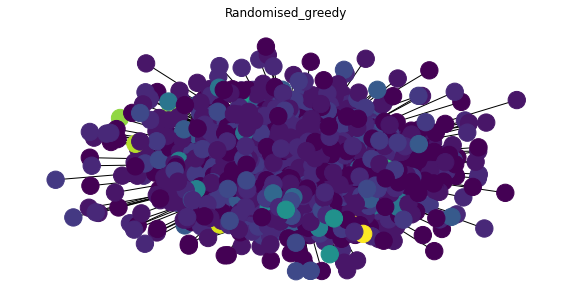

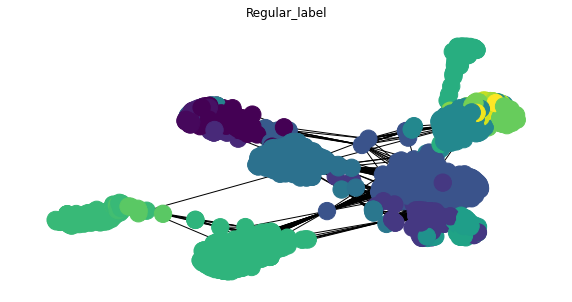

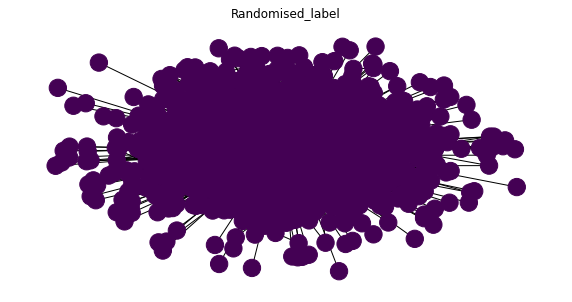

In [9]:
print(f"Size of greedy Facebook community before random = {len(greedy_dict['Facebook'])}")
print(f"Size of greedy Facebook community after random = {len(greedy_randomised_dict['Facebook'])}")
print(f"Size of label Facebook community before random = {len(label_dict['Facebook'])}")
print(f"Size of label Facebook community after random = {len(label_randomised_dict['Facebook'])}")
plot_graph('Regular_greedy', greedy_dict['Facebook'], graphs['Facebook'])
plot_graph('Randomised_greedy', greedy_randomised_dict['Facebook'], randomised_graphs['Facebook'])
plot_graph('Regular_label', label_dict['Facebook'], graphs['Facebook'])
plot_graph('Randomised_label', label_randomised_dict['Facebook'], randomised_graphs['Facebook'])

## A04.2 

In [12]:
from networkx.generators.random_graphs import gnm_random_graph
from networkx.generators.random_graphs import erdos_renyi_graph
from networkx.generators.random_graphs import binomial_graph
from networkx.algorithms.cluster import average_clustering


In [13]:
def create_erdos_renyi_degree(n, average_degree):
    graph = gnm_random_graph(n, n/2*average_degree)
    assert(sum(dict(graph.degree).values())/n == average_degree)
    return graph



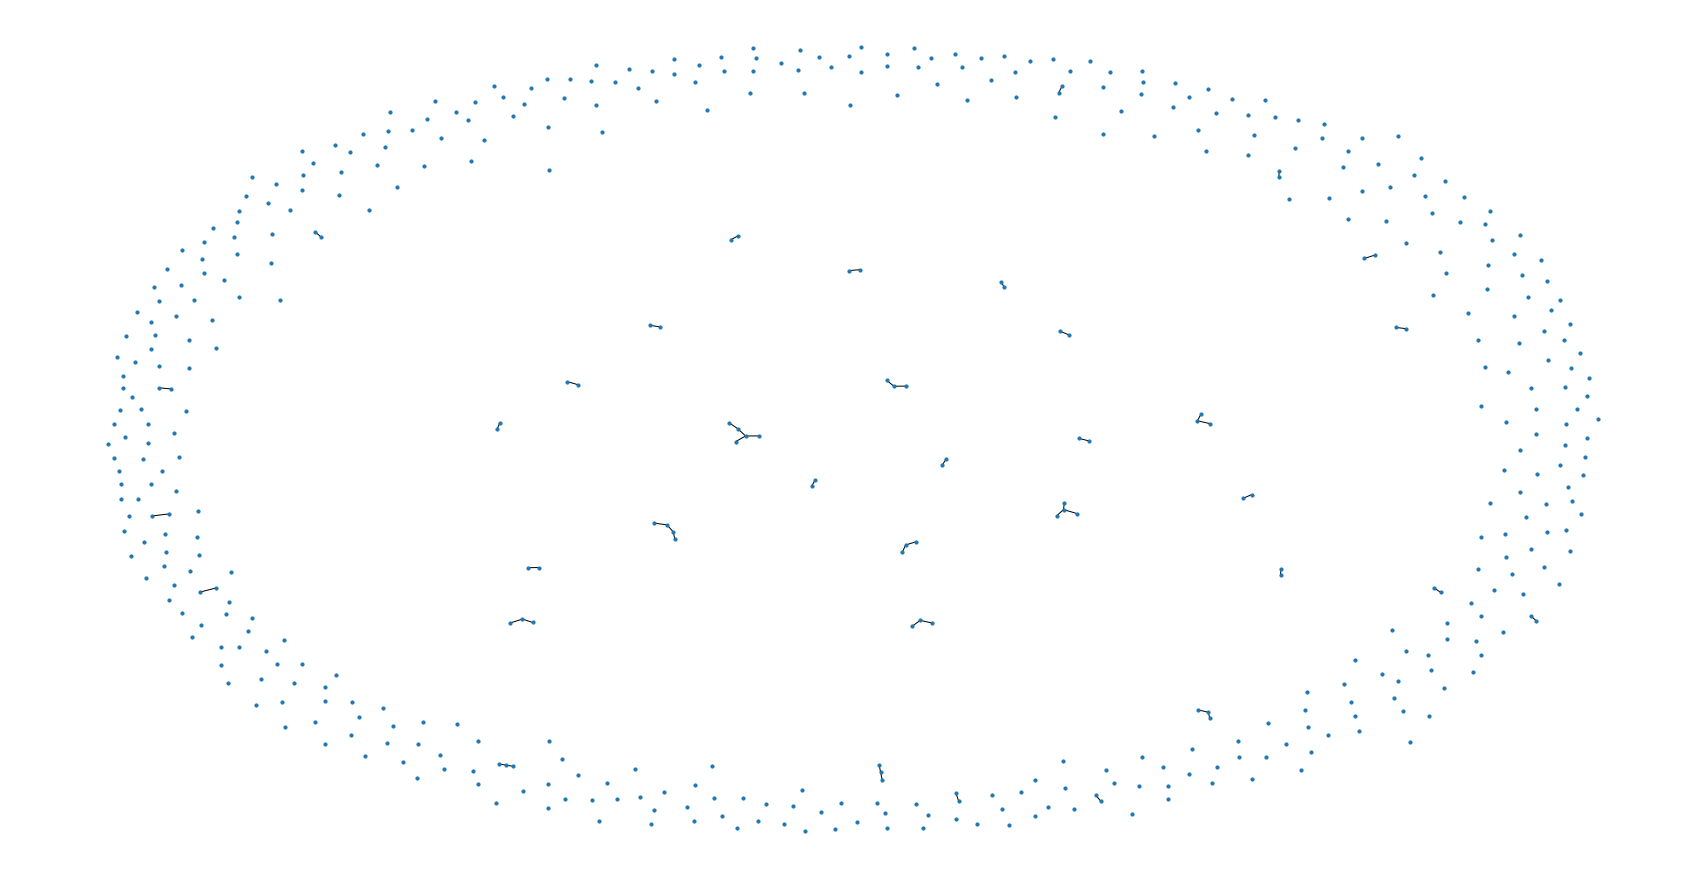

In [14]:
erdos1_d = create_erdos_renyi_degree(500, 0.2)
fig, ax = plt.subplots(figsize=(30, 16))
nx.draw(erdos1_d, node_size=10)
plt.show()

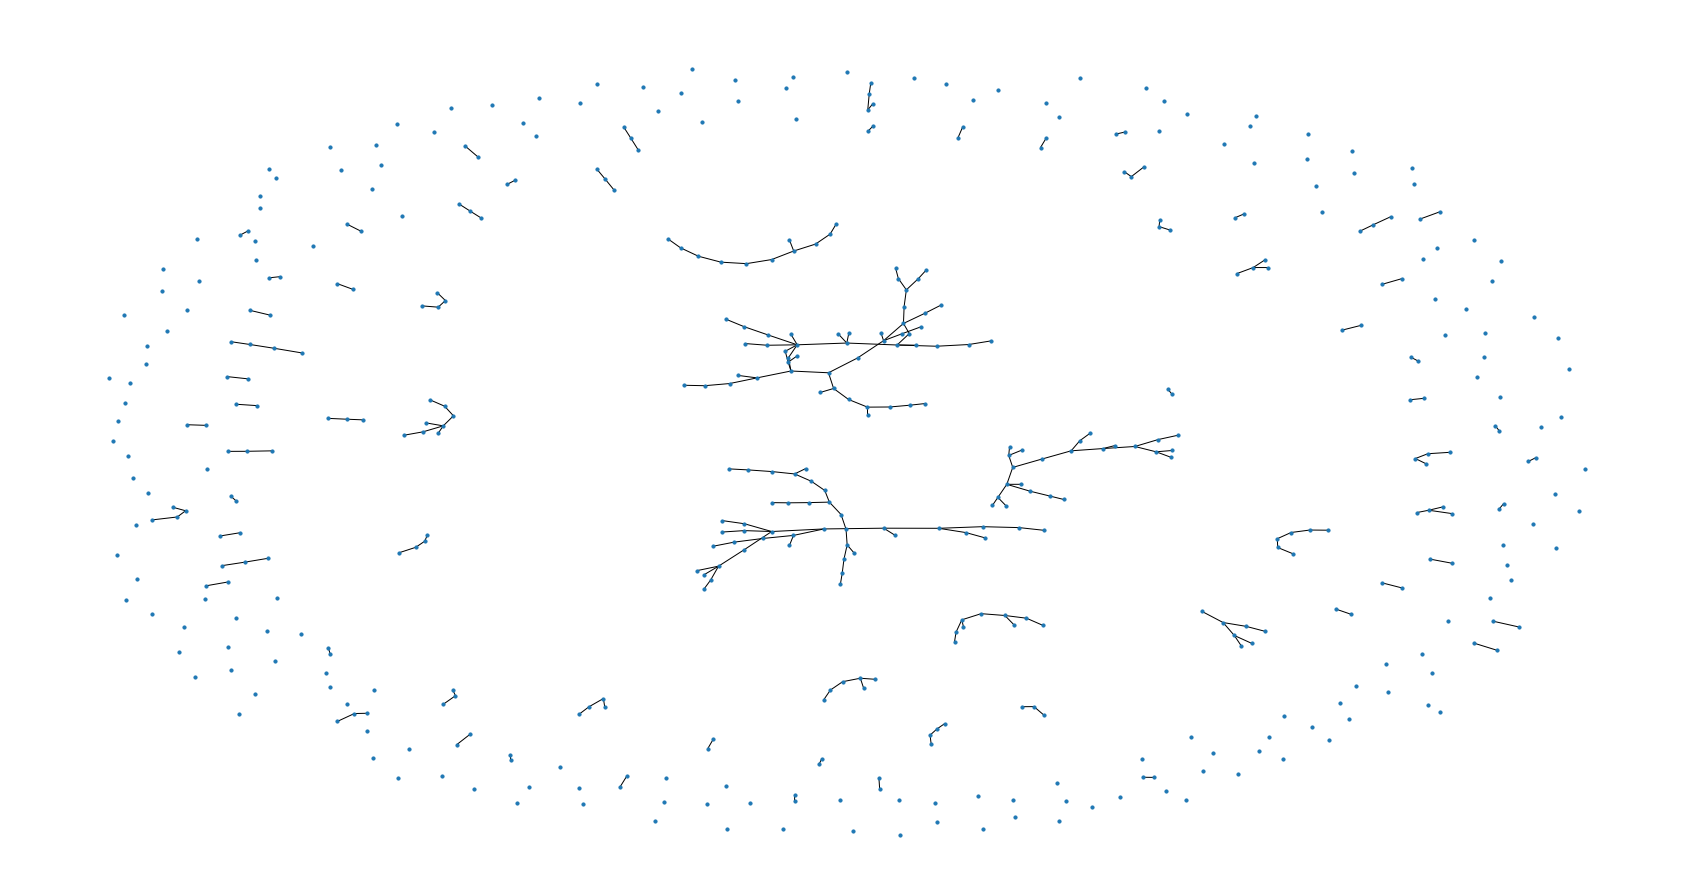

In [15]:
erdos2_d = create_erdos_renyi_degree(500, 1)
fig, ax = plt.subplots(figsize=(30, 16))
nx.draw(erdos2_d, node_size=10)
plt.show()

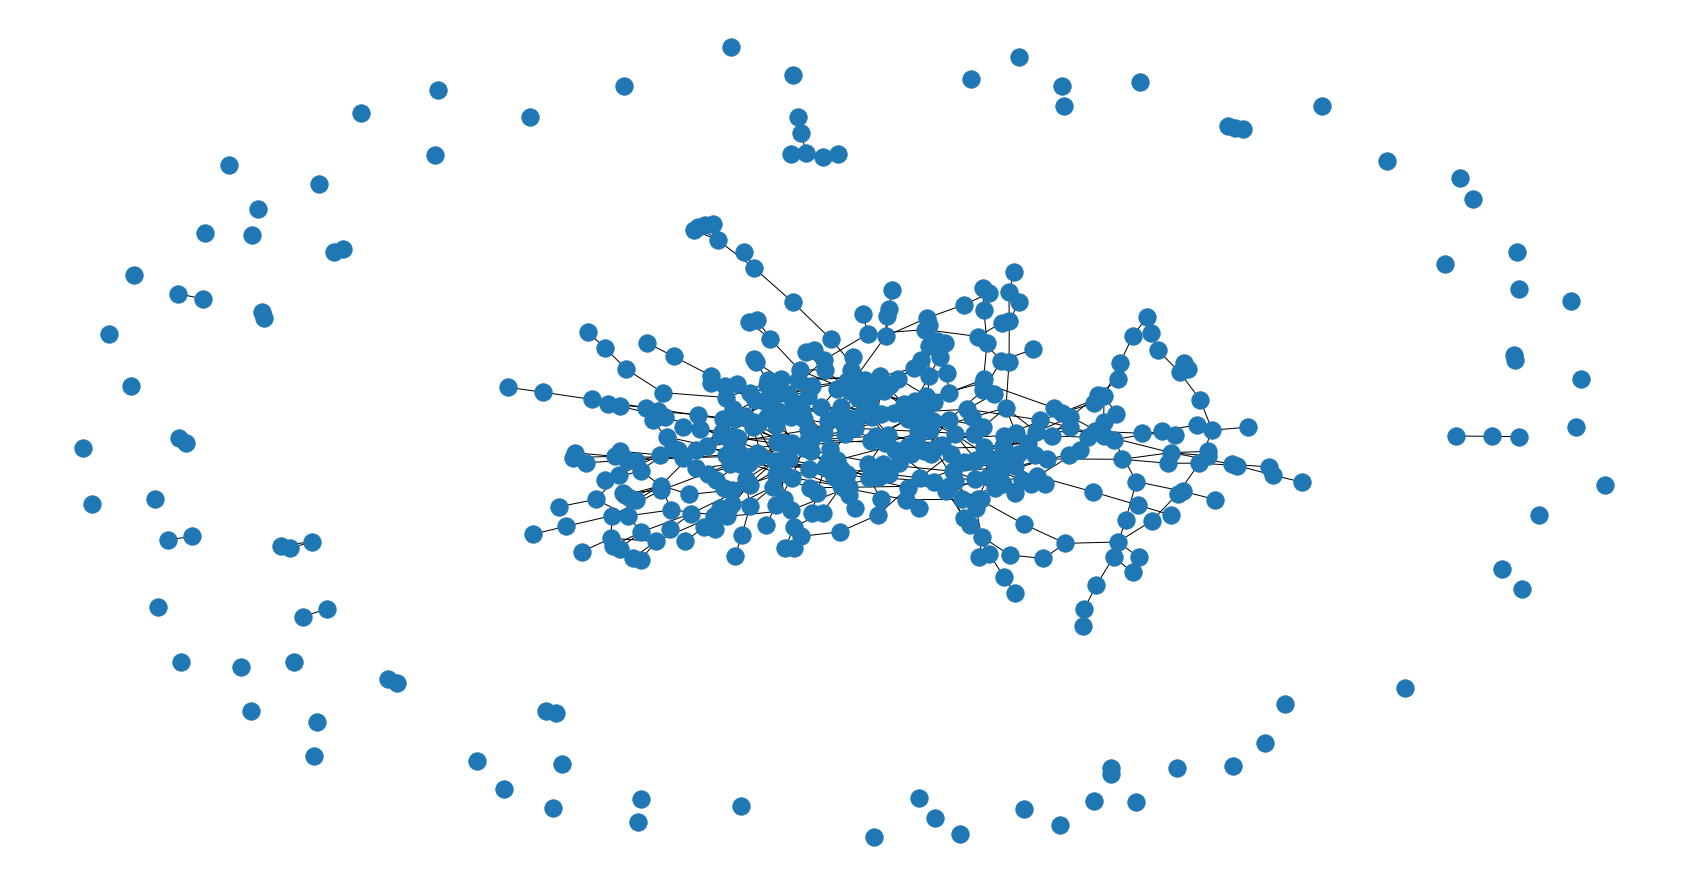

In [16]:
erdos3_d = create_erdos_renyi_degree(500, 2)
fig, ax = plt.subplots(figsize=(30, 16))
nx.draw(erdos3_d, nx.spring_layout(erdos3_d))
plt.show()

In [17]:
def create_erdos_renyi_probability(n, p):
    graph = erdos_renyi_graph(n,p)
    return graph

def get_connected_to_largest_component_probability(graph: nx.Graph) -> float:
    if(nx.is_connected(graph)):
        return 1.0

    largest_component = sorted(nx.connected_components(graph), key=len, reverse=True)[0]
    return len(largest_component) / graph.number_of_nodes()


In [59]:
n = 100
trials = 100
ps = np.linspace(0,1,50)
probabilities = []
clusters = []
for p in ps:
    proba_list_for_p = []
    cluster_list_for_p = []
    for i in range(trials):
        erdos_p = create_erdos_renyi_probability(100,p)
        proba_list_for_p.append(get_connected_to_largest_component_probability(erdos_p))
        cluster_list_for_p.append(average_clustering(erdos_p))
    probabilities.append(np.mean(proba_list_for_p))
    clusters.append(np.mean(cluster_list_for_p))


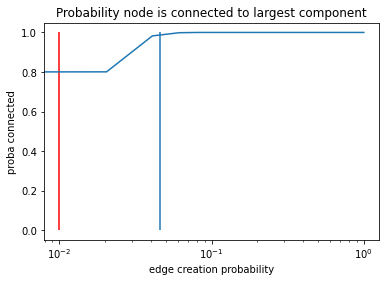

In [60]:
plt.plot(ps, probabilities)
plt.xlabel("edge creation probability")
plt.ylabel("proba connected")
plt.title("Probability node is connected to largest component")
plt.xscale("log")
plt.vlines(1/n,ymin=0,ymax=1, color="red")
plt.vlines(np.log(n)/n,ymin=0, ymax=1)
plt.show()

The red-line refers to the formula used to describe the critical probability as described in the excercise.
The blue-line refers to the formula 

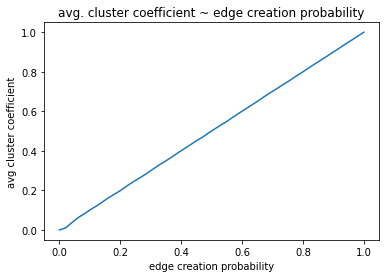

In [34]:
plt.plot(ps, clusters)
plt.xlabel("edge creation probability")
plt.ylabel("avg cluster coefficient")
plt.title("avg. cluster coefficient ~ edge creation probability")

plt.show()

In ER graphs for each node the probability that two of its
neighbors are connected is the same probability that any
other two nodes will be connected and it is equal to p.

## A04.3

In [40]:
from networkx.generators.random_graphs import watts_strogatz_graph
from networkx.algorithms.shortest_paths.generic import average_shortest_path_length



In [50]:
def calculate_Cp(p, k):
    return (3 * (k-1)) / (2*(2*k-1)) * (1-p)**3

In [54]:
n = 100
k = 10
CS = []
C_calculated = []
path_length = []
watts_strogatz_graph_0 = watts_strogatz_graph(n,k,0)
C_0 = average_clustering(watts_strogatz_graph_0)
path_length_0 = average_shortest_path_length(watts_strogatz_graph_0)
p = 0.5
probabilities = np.linspace(0,1,50)
for p in probabilities:
    wsg = watts_strogatz_graph(n,k,p)
    C_calculated.append(calculate_Cp(p,k)/C_0)
    CS.append(average_clustering(wsg)/C_0)
    path_length.append(average_shortest_path_length(wsg)/path_length_0)
    





    

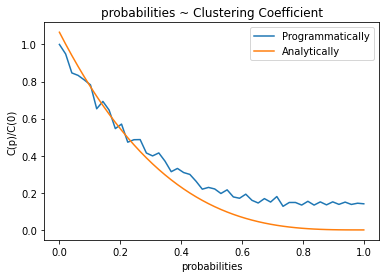

In [55]:
plt.plot(probabilities, CS, label="Programmatically")
plt.plot(probabilities, C_calculated, label="Analytically")
plt.xlabel("probabilities")
plt.ylabel("C(p)/C(0)")
plt.title("probabilities ~ Clustering Coefficient")
plt.legend()

It seems that for probabilities < 0.5 it reproduces the correct results.

Text(0.5, 1.0, 'probabilities ~ D(p)/D(0)')

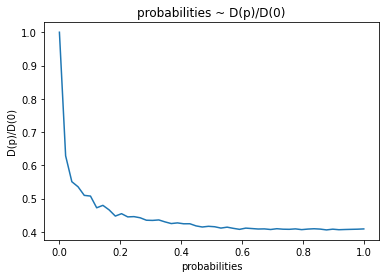

In [57]:
plt.plot(probabilities, path_length)
plt.xlabel("probabilities")
plt.ylabel("D(p)/D(0)")
plt.title("probabilities ~ D(p)/D(0)")